In [24]:
# import the necessary packages
import numpy as np
import pandas as pd
import cv2
import csv
import itertools
import seaborn as sn
from matplotlib import pyplot as plt

In [ ]:
# ! conda update conda

In [ ]:
# ! conda install -c open3d-admin -c conda-forge open3d

In [20]:
# Reading the image file and saving the colour bands in to 4 seperate bands
image = cv2.imread("F:/Berlin-DOP_2020/test/dop10rgbi_391_5824_1_be_2020.tif", cv2.IMREAD_UNCHANGED)
(R, G, B, N) = cv2.split(image)

In [21]:
R_1 = R.reshape(100000000)
G_1 = G.reshape(100000000)
B_1 = B.reshape(100000000)
N_1 = N.reshape(100000000)

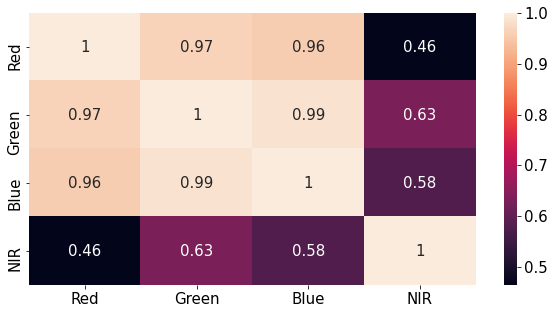

In [33]:
dataset = pd.DataFrame({'Red': R_1, 'Green': G_1, 'Blue': B_1, 'NIR': N_1 })
corrMatrix = dataset.corr()
plt.figure(figsize = (10,5))
plt.rcParams.update({'font.size': 15})
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [3]:
# show each channel individually
# cv2.imshow("Red", R)
# cv2.imshow("Green", G)
# cv2.imshow("Blue", B)
# cv2.waitKey(0)

In [4]:
# merge the image back together again
#merged = cv2.merge([R, G, B, N])
# cv2.imshow("Merged", merged)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [5]:
# Writing the merged image to a png file
#cv2.imwrite('F:/Berlin-DOP_2020/test/dop10rgbi_391_5824_1_be_2020.png', merged)

In [6]:
# Checking if the bands are saved properly
# xx = cv2.imread("F:/Berlin-DOP_2020/test/dop10rgbi_368_5808_1_be_2020.png", cv2.IMREAD_UNCHANGED)
# (R_1, G_2, B_3, N_4) = cv2.split(image)
# N_4.shape

In [7]:
# Reading the roughness indexes
df = pd.read_csv('B:/Masters/Thesis/Git/Point_cloud.csv')

# Reading the tiff file name
file_name = 'dop10rgbi_391_5824_1_be_2020'

# Data processing steps
df = df.rename(columns={'0': 'x', '1': 'y', '2': 'values' })
df['values'] =  df['values'].apply(lambda x: x.replace('[','').replace(']',''))
df['values'] = df['values'].astype(float)

# Taking the x and y limits of the image
x_start = (int(file_name.split('_')[1]))*1000
x_end = x_start+1000
y_start = (int(file_name.split('_')[2]))*1000
y_end = y_start +1000

print(x_start, x_end, y_start, y_end)

391000 392000 5824000 5825000


In [8]:
# Making a dataframe to include all pixels within the range
X = np.arange(x_start,x_end)
Y = np.arange(y_start,y_end)

combs = np.array(list(itertools.product(X,Y)))
combs_df = pd.DataFrame(combs)
combs_df.columns = ['x_round', 'y_round']
combs_df.dtypes

df['x_round'] = df.x.round(0).astype('int')
df['y_round'] = df.y.round(0).astype('int')
df[(df.x_round == 391000) & (df.x_round == 8524000)]
df

final = combs_df.merge(right = df
               , right_on = ['x_round', 'y_round']
               , left_on = ['x_round', 'y_round']
               , how = 'left')

In [9]:
# Filling the missing values
final["values"] = final["values"].fillna(method='ffill')

# Removing duplicate x y values and replacing them with the average value
final = final.groupby(['x_round','y_round']).agg({'values': 'mean'}).reset_index()

In [10]:
# Reshape the values to create a 2D matrix
reshaped = final["values"].values.reshape((1000, 1000))

# Changing the resolution of the roughness index to match the resolution of the original image
resized = cv2.resize(reshaped, (10000,10000), interpolation=cv2.INTER_CUBIC)

# Scaling the roughness index to be within the 0-255 range
scaled = ((resized - resized.min()) * (1/(resized.max() - resized.min()) * 255)).astype('uint8')

In [11]:
rotated = cv2.rotate(scaled, cv2.ROTATE_90_COUNTERCLOCKWISE)
# cv2.imshow("Final_merged", scaled)
# cv2.waitKey(0)

In [12]:
# Final_merged = cv2.merge([R, G, B])
# #cv2.imshow("Final_merged", Final_merged)
# cv2.imwrite('F:/Berlin-DOP_2020/test/dop10rgbi_391_5824_1_be_2020_rgb.png', Final_merged)

In [13]:
# cv2.imwrite('F:/Berlin-DOP_2020/test/dop10rgbi_391_5824_1_be_2020_point.png', rotated)

In [14]:
# # Merging all channels to create the final image
Final_merged = cv2.merge([N,R,G,B])

# #Viewing the final image
# # cv2.imshow("Final_merged", Final_merged)
# # cv2.waitKey(0)

# # Saving the final image
cv2.imwrite('F:/Berlin-DOP_2020/test/dop10rgbi_391_5824_1_be_2020_P_INTER_CUBIC.png', rotated)


True

In [15]:
# del Final_merged